In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
data = pd.read_csv("C:\\Users\\PAWAN\\Downloads\\train.csv")
data.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [3]:
data.shape

(1000, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   v.id           1000 non-null   int64  
 1   on road old    1000 non-null   int64  
 2   on road now    1000 non-null   int64  
 3   years          1000 non-null   int64  
 4   km             1000 non-null   int64  
 5   rating         1000 non-null   int64  
 6   condition      1000 non-null   int64  
 7   economy        1000 non-null   int64  
 8   top speed      1000 non-null   int64  
 9   hp             1000 non-null   int64  
 10  torque         1000 non-null   int64  
 11  current price  1000 non-null   float64
dtypes: float64(1), int64(11)
memory usage: 93.9 KB


In [5]:
data.isnull().sum()

v.id             0
on road old      0
on road now      0
years            0
km               0
rating           0
condition        0
economy          0
top speed        0
hp               0
torque           0
current price    0
dtype: int64

In [6]:
data.columns

Index(['v.id', 'on road old', 'on road now', 'years', 'km', 'rating',
       'condition', 'economy', 'top speed', 'hp', 'torque', 'current price'],
      dtype='object')

In [7]:
pair_plot = data[['years', 'km', 'rating',
       'condition', 'economy', 'top speed', 'hp', 'torque', 'current price']].corr()

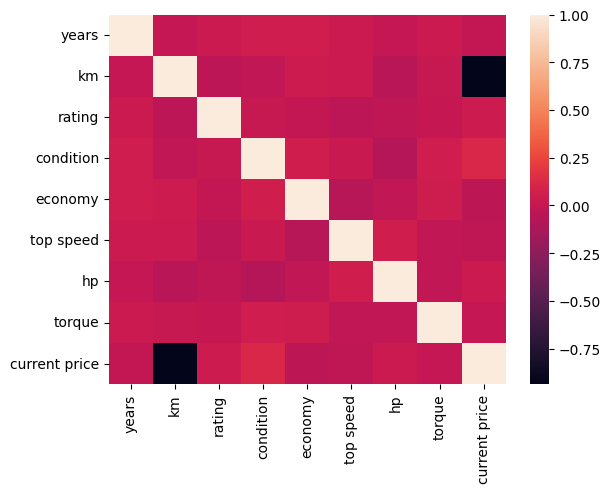

In [8]:
sns.heatmap(pair_plot)
plt.show()

In [9]:
tensor_data = tf.constant(data, dtype= tf.dtypes.float64)
tensor_data = tf.random.shuffle(tensor_data)

In [10]:
print(tensor_data)

tf.Tensor(
[[5.560000e+02 6.425690e+05 7.712340e+05 ... 8.100000e+01 1.360000e+02
  4.310600e+05]
 [8.030000e+02 5.892900e+05 8.278250e+05 ... 1.080000e+02 8.500000e+01
  5.027085e+05]
 [4.750000e+02 5.980990e+05 7.652900e+05 ... 1.030000e+02 7.500000e+01
  4.329515e+05]
 ...
 [3.710000e+02 5.215080e+05 8.398900e+05 ... 7.900000e+01 1.330000e+02
  3.328120e+05]
 [8.560000e+02 5.631320e+05 8.055850e+05 ... 8.800000e+01 8.500000e+01
  1.183485e+05]
 [8.460000e+02 5.994010e+05 8.200270e+05 ... 9.200000e+01 1.260000e+02
  2.435655e+05]], shape=(1000, 12), dtype=float64)


In [61]:
y=tensor_data[:,-1]
x=tensor_data[:,3:-1]


In [62]:
train_size = len(data) * 0.8
test_size = len(data) * 0.1
val_size = len(data) * 0.1

train_size,test_size,val_size

(800.0, 100.0, 100.0)

In [63]:
x_train = x[:int(train_size)]
x_test=x[int(train_size):int(train_size)+int(test_size)]
x_val = x[int(train_size) + int(test_size):]


len(x_train), len(x_test), len(x_val)

(800, 100, 100)

In [64]:
y_train = y[:int(train_size)]
y_test=y[int(train_size):int(train_size)+int(test_size)]
y_val = y[int(train_size) + int(test_size):]


len(y_train), len(y_test), len(y_val)

(800, 100, 100)

In [65]:
print(np.isinf(x).sum())
print(np.isinf(y).sum())

0
0


In [120]:
from tensorflow.keras.layers import Normalization

normalizer = Normalization(input_shape=(8,))

normalizer.adapt(x)

c:\Users\PAWAN\anaconda3\envs\project\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [156]:
from keras.models import Sequential
from keras.layers import Dense, InputLayer

In [157]:
model= Sequential([
    
    InputLayer(input_shape=(8,)),
    normalizer,
    Dense(128,activation="relu"),
    Dense(128,activation="relu"),
    Dense(128,activation="relu"),
    Dense(128,activation="relu"),
    Dense(1)
    
])

c:\Users\PAWAN\anaconda3\envs\project\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [158]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_3 (Normalization) │ (None, 8)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,834 (198.57 KB)

 Trainable params: 50,817 (198.50 KB)

 Non-trainable params: 17 (72.00 B)

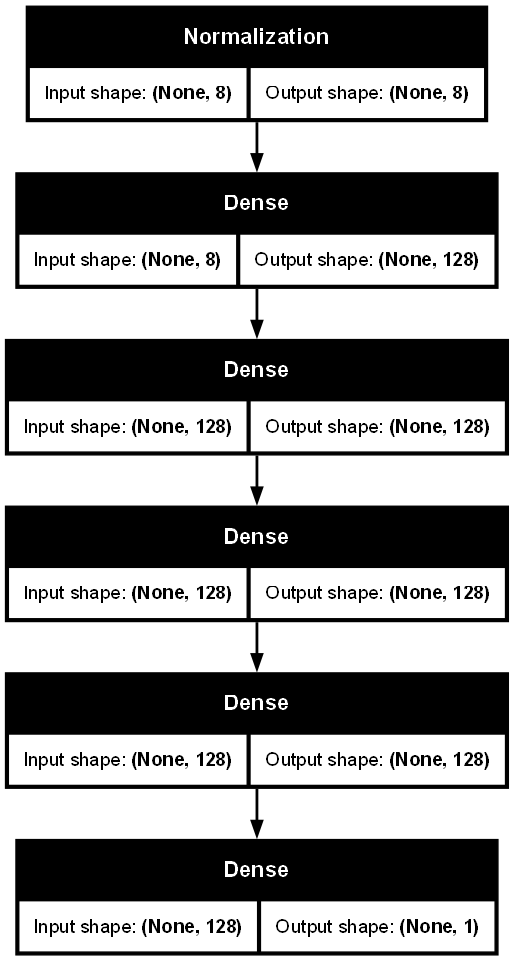

In [159]:
from keras.utils import plot_model

plot_model(model, to_file="model.png",show_shapes=True,dpi=100)

In [160]:
plot_model

<function keras.src.utils.model_visualization.plot_model(model, to_file='model.png', show_shapes=False, show_dtype=False, show_layer_names=False, rankdir='TB', expand_nested=False, dpi=200, show_layer_activations=False, show_trainable=False, **kwargs)>

In [161]:
from keras.optimizers import Adam
from keras.metrics import MeanAbsoluteError as MAS

In [162]:
model.compile(optimizer=Adam(learning_rate=0.1),loss="MSE",metrics=[MAS])

In [163]:
history = model.fit(x_train,y_train,validation_data=(x_val,y_val),batch_size=64,epochs=200,verbose=1)

Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 87155580928.0000 - mean_absolute_error: 255221.3125 - val_loss: 83245342720.0000 - val_mean_absolute_error: 265070.1875
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 77661151232.0000 - mean_absolute_error: 248731.9531 - val_loss: 15810161664.0000 - val_mean_absolute_error: 102337.7969
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 17524729856.0000 - mean_absolute_error: 110485.0312 - val_loss: 10614469632.0000 - val_mean_absolute_error: 84054.4219
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7251654656.0000 - mean_absolute_error: 68170.7188 - val_loss: 4804877312.0000 - val_mean_absolute_error: 55651.9609
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4180196608.0000 - mean_absolute_error: 51982.4531 - val_loss: 4598151680.0000 - val_mean_absolute_error: 53710.4492
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3552728832.0000 - mean_absolute_error: 48356.7227 - va

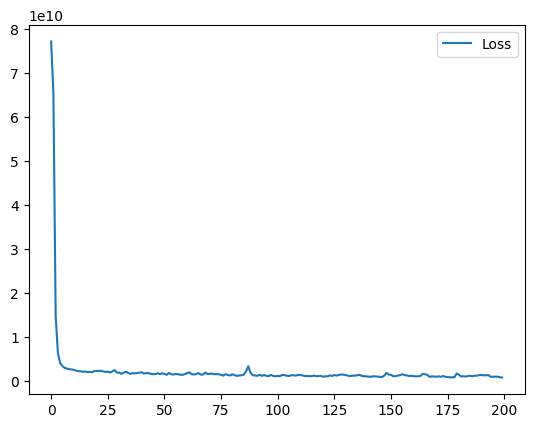

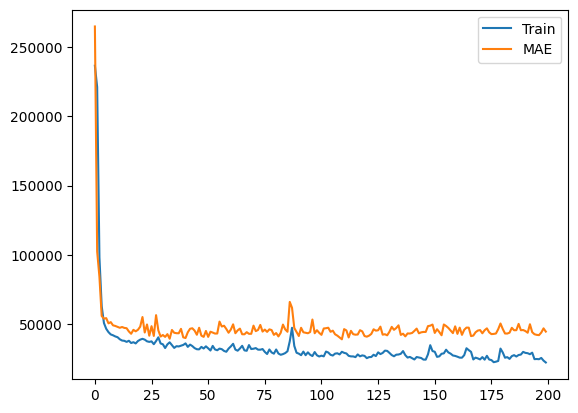

In [167]:
plt.plot(history.history["loss"])
plt.legend(["Loss"])
plt.show()

plt.plot(history.history["mean_absolute_error"])
plt.plot(history.history["val_mean_absolute_error"])
plt.legend(["Train","MAE"])
plt.show()

In [168]:
model.evaluate(x_test,y_test)



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2595237376.0000 - mean_absolute_error: 41987.3398


[2544879104.0, 41098.15234375]

In [169]:
y_predicted = model.predict(x_test)
print(y_predicted[1],y_test[1])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[359019.53] tf.Tensor(421655.5, shape=(), dtype=float64)
